<a href="https://colab.research.google.com/github/Kac1509/ZebrafishClassifier/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os

#Set if running locally or in Google Colaboratory
Colab = False
if Colab:
    Script_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/scripts'
    Base_path = '/content/gdrive/My Drive/Colab Notebooks/Classifier/'
    from google.colab import drive
    drive.mount('/content/gdrive')
else:
    Script_path = os.getcwd() + '/Classifier/scripts'
    Base_path = 'Classifier/'

#Add script folder to system path
sys.path.insert(0, Script_path)
print(sys.path)

['C:\\Users\\Kaleem\\EPFL\\Fall 2018\\Machine Learning\\Project_2\\Git\\ZebrafishClassifier/Classifier/scripts', '', 'C:\\Users\\Kaleem\\Anaconda3\\python36.zip', 'C:\\Users\\Kaleem\\Anaconda3\\DLLs', 'C:\\Users\\Kaleem\\Anaconda3\\lib', 'C:\\Users\\Kaleem\\Anaconda3', 'C:\\Users\\Kaleem\\AppData\\Roaming\\Python\\Python36\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.6-py3.6.egg', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg', 'C:\\Users\\Kaleem\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Kaleem\\AppData\\Roaming\\SPB_Data\\.ipython']


In [2]:
%load_ext autoreload
%autoreload 2

from build_model_RMSprop import *
from create_data_generators import *
from createFolders import *
from createSets import *
from GenotypeClass import *
from load_pre_trained_VGG16 import *
from load_pre_trained_Inception import *
from model_prediction import *
from plot_loss_acc import *
from predictClass import *
from saveFiles import *
from unzip_data import *

C:\Users\Kaleem\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [17]:
#Name of the data zipfile
Data_file = 'DataStraightened.zip'

#Set Paths
Zip_path = Base_path + Data_file
Extracted_path = Base_path + 'ExtractedData/'
Partitioned_path = Base_path + 'PartitionedData/'
Prediction_path = Base_path + 'Predictions/'
Validation_prediction_path = Base_path + 'Validation_Predictions/'


In [4]:
#Specify input parameters for the pre_trained model
shapeY = 50
shapeX = 150
color_channels = 3

# Loading pre-trained models

#VGG16 Model
local_weights_file_VGG16 = Base_path + 'weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model_VGG16, last_layer_output_VGG16 = load_pre_trained_VGG16(local_weights_file_VGG16, shapeY, shapeX, color_channels)

# Inception Model
#local_weights_file_Inception = Base_path + 'weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
#pre_trained_model_Inception, last_layer_output_Inception = load_pre_trained_Inception(local_weights_file_Inception, shapeY, shapeX, color_channels)


In [5]:
#Clear Folders and create Prediction folder
deleteFiles(Extracted_path)
deleteFiles(Partitioned_path)
createFolder(Prediction_path)


In [7]:
#Extract Data
unzip_data(Zip_path, Extracted_path)

In [8]:

Genotypes = []
num_classes = len(glob.glob(Extracted_path+'*'))
for i in range(num_classes):
        #Retrieve directory for a given type
        Genotype_name = os.listdir(Extracted_path)[i]
        Genotypes.append(Genotype(Genotype_name))
print(num_classes)
createDirectories(num_classes,Extracted_path,Partitioned_path,Genotypes)


3


<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1359x150 at 0x21D72C1D320>


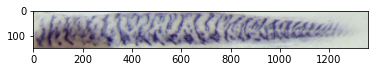

In [9]:
#Sample Image 
print(Genotypes[1].images[0])
plt.imshow(Genotypes[1].images[0])

In [10]:
#Partition data into training and test set
#If fixed set to true, all training and test sets have the same size for all classes 
createTrain_Test(Genotypes,0.5, fixed = True)

31
76
33


In [12]:
#Save partitions to respective folders
saveFiles(Genotypes)

In [13]:
# Creating training and validation data generators from separated data
# Transformations are for training generator only

train_generator, validation_generator = create_data_generators(
    Partitioned_path,
    shapeY, shapeX, 
    train_batch_size=12, 
    validation_batch_size=15,
    class_mode='categorical')#,
    #rotation_range=30,
    #width_shift_range=0.3,
    #height_shift_range=0.3,
    #shear_range=0.3,
    #zoom_range=0.3)

Found 48 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


In [14]:
# Building model

model = build_model_RMSprop(pre_trained_model_VGG16, last_layer_output_VGG16, 
                            learning_rate = 0.00001, hidden_units_num = 1024,num_classes=num_classes,activation = 'softmax')

In [15]:
# Training model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2)

Epoch 1/5
 - 12s - loss: 0.7030 - acc: 0.5625 - val_loss: 0.6718 - val_acc: 0.6222
Epoch 2/5
 - 11s - loss: 0.6418 - acc: 0.6875 - val_loss: 0.6338 - val_acc: 0.6519
Epoch 3/5
 - 11s - loss: 0.6113 - acc: 0.6736 - val_loss: 0.6063 - val_acc: 0.6667
Epoch 4/5
 - 11s - loss: 0.5883 - acc: 0.6667 - val_loss: 0.5840 - val_acc: 0.6741
Epoch 5/5
 - 11s - loss: 0.5682 - acc: 0.6944 - val_loss: 0.5657 - val_acc: 0.6815


In [22]:
#Predict Model based on validation set

model_prediction(
    model, 
    Genotypes,
    Validation_prediction_path,
    shapeY, shapeX, 
    class_mode = 'categorical' # If the content of class0_test_path and class1_test_path should be refreshed
    )

Found 15 images belonging to 1 classes.
15/15 [==============================] - 2s 136ms/step
fsstbx6s
[[0.23410021 0.52361226 0.24228752]
 [0.26432902 0.47688243 0.25878853]
 [0.2614496  0.4832716  0.2552788 ]
 [0.30565003 0.43780744 0.25654256]
 [0.28007928 0.44419    0.27573076]
 [0.29646665 0.4507982  0.25273517]
 [0.2405495  0.50435305 0.25509742]
 [0.2434265  0.44188002 0.31469342]
 [0.29132265 0.44703186 0.26164544]
 [0.25545105 0.46973324 0.2748157 ]
 [0.2604013  0.47539234 0.26420626]
 [0.26620817 0.4734009  0.2603909 ]
 [0.24838865 0.4927567  0.25885466]
 [0.22883469 0.4479798  0.3231855 ]
 [0.28386843 0.40426403 0.31186756]]
Found 15 images belonging to 1 classes.
15/15 [==============================] - 2s 132ms/step
her1her7s
[[0.30207947 0.4026208  0.29529977]
 [0.32723507 0.4281072  0.2446578 ]
 [0.2624788  0.4401106  0.2974106 ]
 [0.28018898 0.44775885 0.27205223]
 [0.32153484 0.4531039  0.22536126]
 [0.30920413 0.39731753 0.29347828]
 [0.27218518 0.44063392 0.28718087

In [23]:
#Predict Model based on Images placed in Prediction Folder

predictions = predictClass(model,Prediction_path, shapeY, shapeX, class_mode='categorical')
print(predictions)

Found 15 images belonging to 1 classes.
15/15 [==============================] - 2s 134ms/step
['her1her7s\\test\\Validation1.png', 'her1her7s\\test\\Validation10.png', 'her1her7s\\test\\Validation11.png', 'her1her7s\\test\\Validation12.png', 'her1her7s\\test\\Validation13.png', 'her1her7s\\test\\Validation14.png', 'her1her7s\\test\\Validation15.png', 'her1her7s\\test\\Validation2.png', 'her1her7s\\test\\Validation3.png', 'her1her7s\\test\\Validation4.png', 'her1her7s\\test\\Validation5.png', 'her1her7s\\test\\Validation6.png', 'her1her7s\\test\\Validation7.png', 'her1her7s\\test\\Validation8.png', 'her1her7s\\test\\Validation9.png']
[[0.30207947 0.4026208  0.29529977]
 [0.28018898 0.44775885 0.27205223]
 [0.29526207 0.39119926 0.31353867]
 [0.22556958 0.49890402 0.27552646]
 [0.27124605 0.4728132  0.25594077]
 [0.2667764  0.40416366 0.32905993]
 [0.30920413 0.39731753 0.29347828]
 [0.249467   0.40054977 0.34998316]
 [0.2624788  0.4401106  0.2974106 ]
 [0.39686298 0.3558573  0.24727969

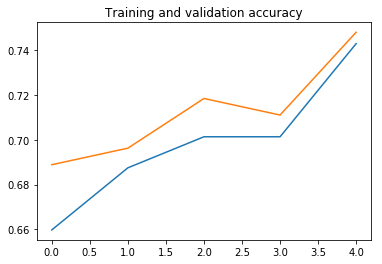

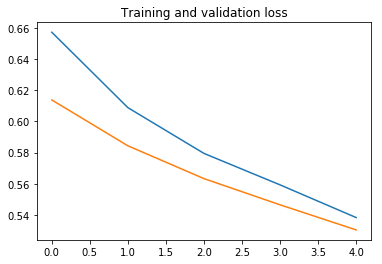

In [19]:
#Plot training and validation accuracy per epoch

plot_loss_acc(history)